NBA Title contender

This project will examine the performance of NBA players from 2016-2019 to predict their performance in 2019-2020 season



Set up work environment with necessary packages


In [66]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [5]:
pd.set_option('display.max_columns', 50)

Extract necessary information


In [2]:
#credit to Oscar Sanchez for writing this article https://towardsdatascience.com/web-scraping-nba-stats-4b4f8c525994

# NBA season we will be analyzing
list_of_dfs = []
# URL page we will scraping (see image above)

for year in range(2010,2020):      # Number of pages plus one 
    url = "https://www.basketball-reference.com/leagues/NBA_{}_advanced.html".format(year)
    r = requests.get(url)
    soup = BeautifulSoup(r.content)

    
    # use findALL() to get the column headers
    soup.findAll('tr', limit=2)
    # use getText()to extract the text we need into a list
    headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
    # exclude the first column as we will not need the ranking order from Basketball Reference for the analysis
    headers = headers[1:]
    

    # avoid the first header row
    rows = soup.findAll('tr')[1:]
    player_stats = [[td.getText() for td in rows[i].findAll('td')] for i in range(len(rows))]

    list_of_dfs.append(pd.DataFrame(player_stats, columns = headers))


In [21]:
#set up for use in python
season2010 = list_of_dfs[0].dropna()
season2011 = list_of_dfs[1].dropna()
season2012 = list_of_dfs[2].dropna()
season2013 = list_of_dfs[3].dropna()
season2014 = list_of_dfs[4].dropna()
season2015 = list_of_dfs[5].dropna()
season2016 = list_of_dfs[6].dropna()
season2017 = list_of_dfs[7].dropna()
season2018 = list_of_dfs[8].dropna()
season2019 = list_of_dfs[9].dropna()

In [22]:
#Export data to csv for visualization on tableau 
for i in range (0,len(list_of_dfs)):
    filename = r'C:\Users\tienv\Documents\GitHub\NBA-analysis\players_{}.csv'.format(i)
    list_of_dfs[i].to_csv(filename)
#ran this chunk only once



In [68]:
season2016.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,,OWS,DWS,WS,WS/48,,OBPM,DBPM,BPM,VORP
0,Quincy Acy,PF,25,SAC,59,876,14.7,.629,.229,.318,8.1,15.1,11.6,4.4,1.6,2.2,10.0,13.1,,1.8,0.7,2.5,.137,,0.2,0.0,0.2,0.5
1,Jordan Adams,SG,21,MEM,2,15,17.3,.427,.167,.833,0.0,15.9,7.6,31.9,10.3,0.0,19.6,30.5,,0.0,0.0,0.0,.015,,-2.9,4.8,1.9,0.0
2,Steven Adams,C,22,OKC,80,2014,15.5,.621,.000,.460,12.5,16.1,14.4,4.3,1.0,3.3,14.1,12.6,,4.2,2.3,6.5,.155,,0.8,1.3,2.1,2.1
3,Arron Afflalo,SG,30,NYK,71,2371,10.9,.531,.298,.164,1.1,11.0,6.1,9.9,0.5,0.3,8.7,17.9,,1.8,0.9,2.7,.055,,-0.6,-1.8,-2.4,-0.2
4,Alexis Ajinça,C,27,NOP,59,861,13.8,.514,.003,.197,9.3,25.9,17.3,5.8,1.1,3.4,13.6,20.4,,0.2,0.9,1.0,.058,,-4.3,-0.2,-4.5,-0.5


In [62]:
season2016[['PER','USG%','WS']].astype(float)

,PER,USG%,WS
0,14.7,13.1,2.5
1,17.3,30.5,0.0
2,15.5,12.6,6.5
3,10.9,17.9,2.7
4,13.8,20.4,1.0
5,21.3,18.4,3.5
6,22.4,25.9,10.1
7,11.6,13.3,0.0
8,12.4,13.0,3.7
9,12.9,16.8,2.4


In [65]:
kmeans_model = KMeans(n_clusters=5, random_state=1)
good_columns = season2016[['PER','USG%','WS']].astype(float)
kmeans_model.fit(good_columns)
labels = kmeans_model.labels_


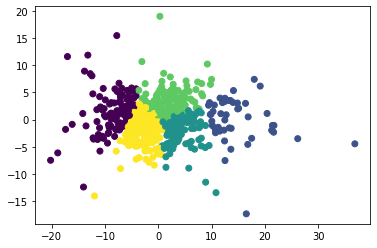

In [67]:
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(good_columns)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.show()